In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("loan.csv")

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(20000, 142)

In [7]:
columns_to_drop = ['zip_code', 'policy_code', 'application_type', 'last_credit_pull_d',
                   'verification_status', 'pymnt_plan', 'funded_amnt_inv', 'sub_grade', 
                   'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                   'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
                   'last_pymnt_amnt', 'initial_list_status']

# Drop only columns that exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

# Alternatively, using errors='ignore'
# df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')


In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=122)


In [10]:
col_num = 0
TotalObjects = df.shape[0]
print("Column\t\t\t\t\tNull Values%")

for x in df.columns:  # Iterate through column names
    nullCount = df[x].isnull().sum()  # Count of null values in the column
    nullPercent = (nullCount * 100) / TotalObjects  # Percentage of null values
    
    if nullCount > 0 and nullPercent > 20:
        col_num += 1
        df.drop(x, axis=1, inplace=True)  # Drop the column if it meets the condition
        print(f"{x}\t\t\t\t\t{nullPercent:.2f}")  # Print the column name and null percentage

print(f"A total of {col_num} columns deleted!")



Column					Null Values%
id					100.00
member_id					100.00
url					100.00
desc					100.00
mths_since_last_delinq					56.38
mths_since_last_record					88.41
mths_since_last_major_derog					77.47
annual_inc_joint					87.84
dti_joint					87.84
verification_status_joint					89.17
mths_since_recent_bc_dlq					80.36
mths_since_recent_revol_delinq					71.30
revol_bal_joint					87.84
sec_app_earliest_cr_line					87.84
sec_app_inq_last_6mths					87.84
sec_app_mort_acc					87.84
sec_app_open_acc					87.84
sec_app_revol_util					88.00
sec_app_open_act_il					87.84
sec_app_num_rev_accts					87.84
sec_app_chargeoff_within_12_mths					87.84
sec_app_collections_12_mths_ex_med					87.84
sec_app_mths_since_last_major_derog					96.30
hardship_type					100.00
hardship_reason					100.00
hardship_status					100.00
deferral_term					100.00
hardship_amount					100.00
hardship_start_date					100.00
hardship_end_date					100.00
payment_plan_start_date					100.00
hardship_length					100.00
hardship_dpd					100.

In [11]:
df.shape


(20000, 79)

In [12]:
df['emp_title'].fillna('Unknown', inplace=True)
df['dti'].fillna(0, inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)


C:\Users\anjan\AppData\Local\Temp\ipykernel_50448\1696512347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_title'].fillna('Unknown', inplace=True)
C:\Users\anjan\AppData\Local\Temp\ipykernel_50448\1696512347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [13]:
# Set missing values of 'next_pymnt_d' column to 'Completed'
df['next_pymnt_d'].fillna('Completed', inplace=True)



C:\Users\anjan\AppData\Local\Temp\ipykernel_50448\2271474943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['next_pymnt_d'].fillna('Completed', inplace=True)


In [14]:
columns_to_zero = [
    'mths_since_rcnt_il', 
    'mo_sin_old_il_acct', 
    'bc_open_to_buy', 
    'num_tl_120dpd_2m', 
    'bc_util', 
    'percent_bc_gt_75'
]
df[columns_to_zero] = df[columns_to_zero].fillna(0)


In [15]:
# Set missing values of 'all_util' and 'avg_cur_bal' columns to their mean values
columns_to_mean = [
    'all_util', 
    'avg_cur_bal'
]
for column in columns_to_mean:
    df[column] = df[column].fillna(df[column].mean())

In [16]:
df.shape

(20000, 79)

In [17]:
df.head(5)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,...,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,...,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,...,0.0,0,0,157548,29674,9300,32332,N,Cash,N


In [18]:
pd.unique(df['emp_length'].values)

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [19]:
def CalculateEmployeeLength(year):
    if year == '< 1 year':
        return 0.5
    elif year == '10+ years':
        return 10
    else:
        yr = str(year)
        return float(yr.rstrip(' years'))


In [20]:
df['emp_length']=df['emp_length'].apply(CalculateEmployeeLength)

In [42]:
df['emp_length']

0        10.0
1        10.0
2         6.0
3        10.0
4        10.0
         ... 
19995    10.0
19996    10.0
19997     3.0
19998     6.0
19999     0.5
Name: emp_length, Length: 20000, dtype: float64

In [21]:
# Visualizing data
def CalculateLoanRanges(value):
    if value <= 5000:
        return '5K and Below'
    if value > 5000 and value <= 10000:
        return '5K-10K'
    if value > 10000 and value <= 15000:
        return '10K-15K'
    if value > 15000 and value <= 20000:
        return '15K-20K'
    if value > 20000 and value <= 25000:
        return '20K-25K'
    if value > 25000 and value <= 30000:
        return '25K-30K'
    if value > 30000:
        return '30K and Above'
    return 'Other'


In [22]:
loan_ranges = df['loan_amnt'].apply(CalculateLoanRanges)

In [23]:
loan_ranges.value_counts()

loan_amnt
5K-10K           5063
10K-15K          3472
15K-20K          3118
5K and Below     2898
30K and Above    2268
20K-25K          1834
25K-30K          1347
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Loan Amount')

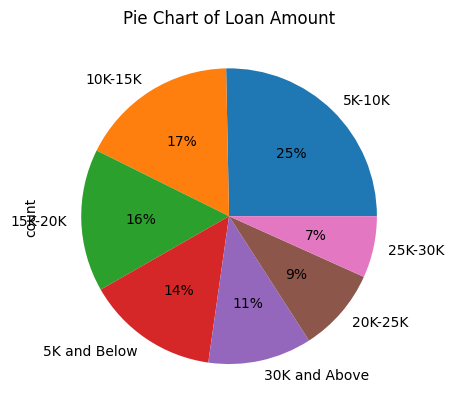

In [24]:
f = plt.figure()
loan_ranges.value_counts().plot.pie(autopct='%1.0f%%',)
plt.title('Pie Chart of Loan Amount')

<Axes: xlabel='purpose'>

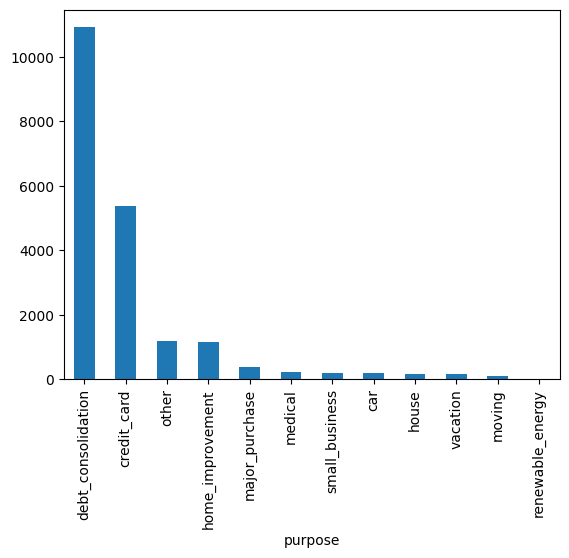

In [25]:
pur = df['purpose'].value_counts()
pur.plot(kind='bar')


In [26]:
df.to_csv('cleaned_loans2007.csv', index=False,encoding='utf-8')

In [27]:
#ACTIVITY 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
df_boston = pd.read_csv('Airdata.csv')

In [29]:
df_boston.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


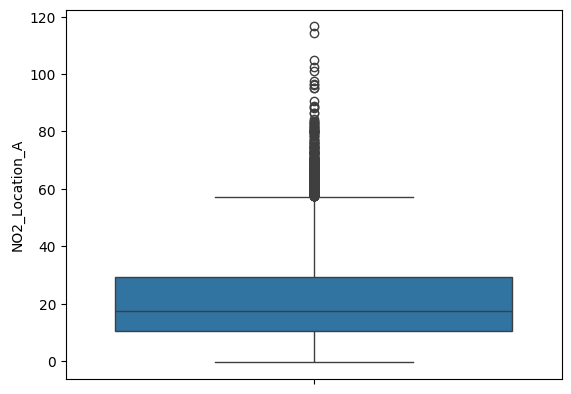

In [30]:
sns.boxplot(df_boston['NO2_Location_A'])
plt.show()

In [31]:
percentile25 = df_boston['NO2_Location_A'].quantile(0.25)
percentile75 = df_boston['NO2_Location_A'].quantile(0.75)

iqr = percentile75-percentile25


In [32]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)


In [33]:
new_df_cap = df_boston.copy()
new_df_cap['NO2_Location_A'] = np.where(
 new_df_cap['NO2_Location_A'] >= upper_limit, upper_limit,
 np.where(new_df_cap['NO2_Location_A'] <= lower_limit, lower_limit,
 new_df_cap['NO2_Location_A']
 )
)

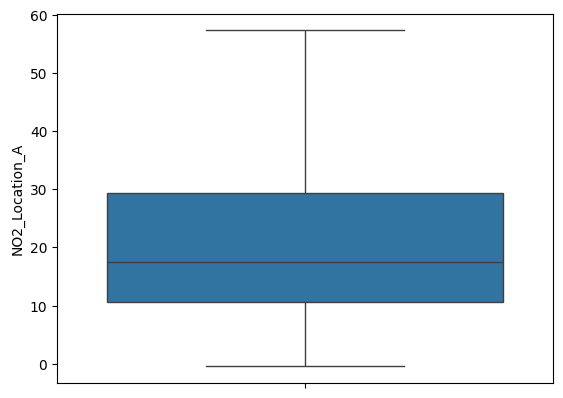

In [34]:
sns.boxplot(new_df_cap['NO2_Location_A'])
plt.show()

In [35]:
#Activity 3
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [44]:
df=pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv")


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df.head()

In [ ]:
df.dtypes


In [ ]:
df["gender"]=df["gender"].map({"Female":1,"Male":0})
df["Contract"]=df["Contract"].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df["PaperlessBilling"]=df["PaperlessBilling"].map({"Yes":0,"No":1})
#select needed columns
cat_df=df[["gender","Contract","PaperlessBilling","Churn"]]
cat_df.head()

In [ ]:
#Independent variable
x=cat_df.iloc[:,:-1]
#Target variable
y=cat_df.iloc[:,-1]
#returns f score and p value
f_score=chi2(x,y)
f_score
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True)

In [ ]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()